# 인구 구조 


In [ ]:
import csv

f = open('ages.csv')
data = csv.reader(f)

result = []
name = input('인구 구조가 알고 싶은 지역의 이름(동 단위)을 입력하시오 : ')

for row in data:
    if name in row[0]:
        print(row)
        for i in row[3:]:
            i = i.replace(',', '')
            result.append(int(i))
print(result)

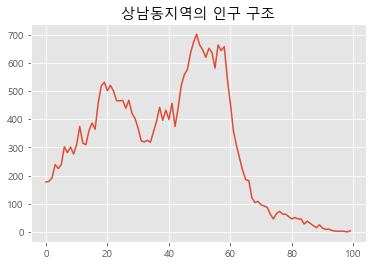

In [4]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.rc('font', family='Malgun Gothic')
plt.title(name+'지역의 인구 구조')
plt.plot(result)
plt.show()

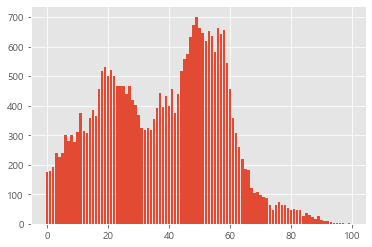

In [5]:
plt.bar(range(100),result) # 막대를 표시할 위치, 막대의 높이
plt.show()

- 성별에 따른 인구구조

In [47]:
import csv

f = open('gender.csv') # 남여 연령별 인구수
data = csv.reader(f)
name = input('인구 구조가 알고 싶은 지역의 이름(동 단위)을 입력하시오 : ')

m = []
f = []


for row in data:
    if name in row[0]:
        for i in row[105:205]:
            i = i.replace(',', '')
            m.append(-int(i))
        for j in row[207:]:
            j = j.replace(',', '')
            f.append(int(j))
        break  # 상남동 지역명이 겹치는 경우 한개 동만 저장하기 위함
    
print(len(f),len(m))

인구 구조가 알고 싶은 지역의 이름(동 단위)을 입력하시오 : 상남동
100 100


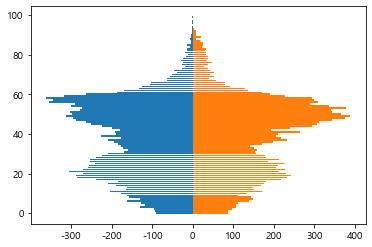

In [48]:
import matplotlib.pyplot as plt

plt.barh(range(100), m)
plt.barh(range(100),f)
plt.show()

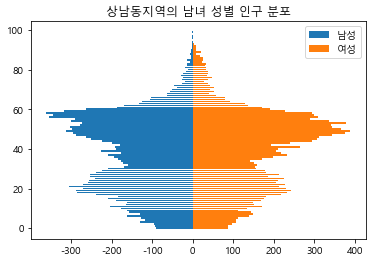

In [49]:
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False # - 부호 표시
plt.title(name+'지역의 남녀 성별 인구 분포')
plt.barh(range(100), m, label='남성')ㅠ
plt.barh(range(100), f, label='여성')
plt.legend()
plt.show()

- pie : 전체 데이터 중 특정 데이터의 비율을 보기 쉽게 표현    
  
plt.pie(  
size (pie chart 수),  
lable (legend),  
autopct (size percent 표시)  
color (pie color)  
explode ( 특정 파이 돌출)  
)

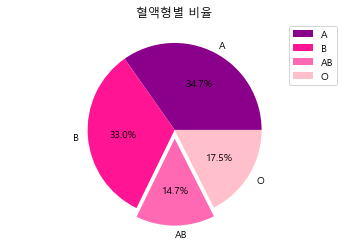

In [62]:
import matplotlib.pyplot as plt

plt.rc('font',family='Malgun Gothic')
size = [ 2441, 2321, 1031,1233]
label = ['A','B','AB','O']
color =['darkmagenta', 'deeppink', 'hotpink','pink']
plt.title('혈액형별 비율')
plt.axis('equal')
plt.pie(size, labels=label, autopct = '%.1f%%',colors = color, explode = (0,0,0.1,0))
plt.legend()
plt.show()

- 성비 합계 인구 비율

In [71]:
import csv

f = open('gender.csv') # 남여 연령별 인구수
data = csv.reader(f)

m = []
f = []
size = []

for row in data:
    if '상남동' in row[0]:
        for i in row[105:205]:
            i = i.replace(',', '')
            m.append(int(i))
        for j in row[207:]:
            j = j.replace(',', '')
            f.append(int(j))
        break  # 상남동 지역명이 겹치는 경우 한개 동만 저장하기 위함
    
size.append(sum(m))
size.append(sum(f))
print(size)


[15007, 14665]


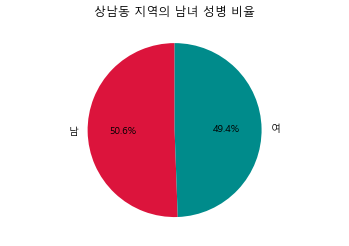

In [72]:
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
color = ['crimson', 'darkcyan']
plt.axis('equal')
plt.pie(size, labels=['남','여'], autopct='%.1f%%', colors = color, startangle=90) # atartangle = 90 이면 12시 정각에서 부터 시작된다.
plt.title('상남동 지역의 남녀 성병 비율')
plt.show()

- 연령대별 성별 인구수 차이 ( 남 - 여)

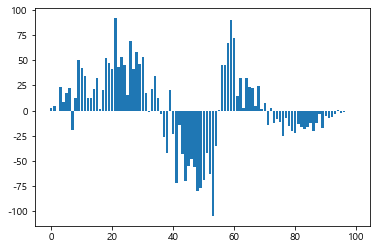

In [75]:
diff = []

for i in range(100):
    diff.append(m[i] - f[i])

plt.bar(range(100),diff)
plt.show()

* 산점도 : x,y로 서로 어떤 관계를 가지고 있는지 파악.  
  
scatter(  
[] x축 해당 값,  
[] y축 해당 값,  
s = 점의 크기,  
c = 점의 색,  
cmap = 컬러맵??    
alpha = 투명도 조절 (0 투명 - 1 불투명)  
)

- 성별 비율을 산점도로  
추세선을 남자 인구를 직선형태로 표시하였다.   
직선보다 위에 있다면 여성인구가 더 많다는 의미이다.  
도한 남녀 인구 비율이 비례형태에 있음을 알 수 있다.  

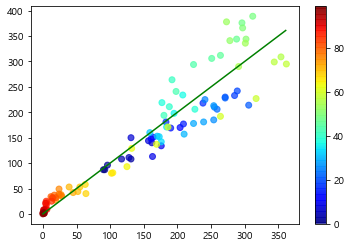

In [77]:
plt.scatter(m,f,c=range(100),alpha=0.7,cmap='jet')
plt.colorbar()
plt.plot(range(max(m)),range(max(m)),'g') # 추세선 
plt.show()